In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

C:\Users\maslo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/16_lesson/materials/concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


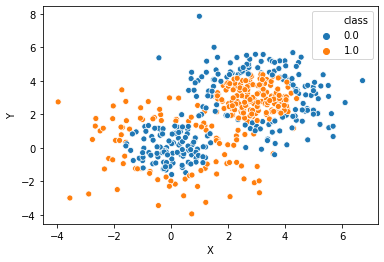

In [3]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [4]:
from sklearn.linear_model import LogisticRegression

X = circ.drop("class", axis=1)
y = circ["class"]

model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

In [33]:
model.__dict__

{'penalty': 'l2',
 'dual': False,
 'tol': 0.0001,
 'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'class_weight': None,
 'random_state': None,
 'solver': 'lbfgs',
 'max_iter': 100,
 'multi_class': 'auto',
 'verbose': 0,
 'warm_start': False,
 'n_jobs': None,
 'l1_ratio': None,
 'feature_names_in_': array(['X', 'Y'], dtype=object),
 'n_features_in_': 2,
 'classes_': array([0., 1.]),
 'n_iter_': array([7]),
 'coef_': array([[-0.00316169, -0.01204832]]),
 'intercept_': array([0.0284847])}

In [6]:
model.coef_

array([[-0.00316169, -0.01204832]])

In [34]:
model.intercept_

array([0.0284847])

In [37]:
X_coef = model.coef_[0][0]
Y_coef = model.coef_[0][1]
b_coef = model.intercept_[0]

In [ ]:
# x * X_coef + y * Y_coef + b_coef = 0
# y = (- x * X_coef - b_coef) / Y_coef

In [11]:
(y == model.predict(X)).mean()

0.424

In [31]:
circ['X'].max(), circ['X'].min()

(6.71, -3.95)

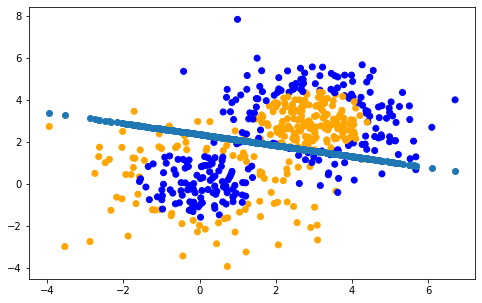

In [38]:
plt.figure(figsize=(8, 5))
plt.scatter(circ['X'], circ['Y'], c=circ['class'].replace([1,0],['orange', 'blue']))
plt.scatter(circ['X'], (- circ['X'] * X_coef - b_coef) / Y_coef)

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [39]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

all_models = []
for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    all_models.append(knn)
    print(k, (y_train == knn.predict(X_train)).mean(), (y_test == knn.predict(X_test)).mean())


1 1.0 0.89
3 0.9475 0.87
10 0.915 0.85
30 0.8525 0.74
40 0.8 0.75
60 0.6925 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [47]:
df = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/16_lesson/materials/processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [52]:
X_centered = (X - X.mean())

In [53]:
X_centered_train, X_centered_test, y_centered_train, y_centered_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_centered)

for k in [1,5,10]:
    pipe = Pipeline([('model', KNeighborsClassifier(n_neighbors=k))])
    pipe.fit(X_train, y_train)
    pipe_accuracy = (y_test == pipe.predict(X_test)).mean()
    
    pipe_scaled = Pipeline([('scaler', StandardScaler()), ('model', KNeighborsClassifier(n_neighbors=k))])
    pipe_scaled.fit(X_train, y_train)
    pipe_scaled_accuracy = (y_test == pipe_scaled.predict(X_test)).mean()
    
    pipe_pca = Pipeline([('pca', pca), ('model', KNeighborsClassifier(n_neighbors=k))])
    pipe_pca.fit(X_centered_train, y_train)
    pipe_pca_accuracy = (y_test == pipe_pca.predict(X_centered_test)).mean()
    
    print(f'k={k}, pipe_accuracy={pipe_accuracy}, pipe_scaled_accuracy={pipe_scaled_accuracy}, pipe_pca_accuracy={pipe_pca_accuracy}')


k=1, pipe_accuracy=0.43819542019519236, pipe_scaled_accuracy=0.5648805681084571, pipe_pca_accuracy=0.3809668476816162
k=5, pipe_accuracy=0.44317016671097104, pipe_scaled_accuracy=0.6303877264269168, pipe_pca_accuracy=0.39775187027683895
k=10, pipe_accuracy=0.4703603843086621, pipe_scaled_accuracy=0.6607678578209851, pipe_pca_accuracy=0.42061291915087534


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [60]:
pipe_scaled = Pipeline(
    [('scaler', StandardScaler()), 
     ('model', KNeighborsClassifier(
         n_neighbors=10,
         p=1
     ))]
)
pipe_scaled.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=10, p=1))])

In [61]:
(y_test == pipe_scaled.predict(X_test)).mean()

0.6611476094634109

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [62]:
df = pd.read_csv('C:/Users/maslo/Desktop/karpov_start_ml/2_module/16_lesson/materials/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


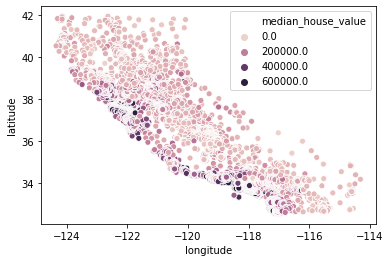

In [63]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

print(mean_squared_error(y_test, lr.predict(X_test)) ** 0.5)

98369.87709657701


In [69]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    print(k, mean_squared_error(y_test, model.predict(X_test_scaled)) ** 0.5)

1 62929.440900187365
2 62917.1420700518
3 69233.64205067341
4 74097.8590152453
5 77013.27692520608
6 78943.65438571562
7 81331.7206855465
8 84020.34123142938
9 85731.40246635766


In [81]:
def kernel(distances, h):
    const = 1 / (np.sqrt(2 * np.pi))
    power = (-1/2) * ((distances) ** 2) / h ** 2
    
    return const * np.exp(power)

In [83]:
for h in np.arange(0.02,0.1,0.01):
    
    def kernel(distances):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances) ** 2) / h ** 2
    
        return const * np.exp(power)

    model = KNeighborsClassifier(n_neighbors=2, weights=kernel)
    model.fit(X_train_scaled, y_train)
    print(h, mean_squared_error(y_test, model.predict(X_test_scaled)) ** 0.5)

0.02 61625.37625860417
0.03 61625.88358866997
0.039999999999999994 61625.37625860417
0.049999999999999996 61625.78932449667
0.06 61622.696687799624
0.06999999999999999 61626.810493419274
0.07999999999999999 61623.45728200121
0.09 61626.7531220888
